**Sources:**

*   OpenCV-Python Tutorials at the [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html#display-image);
*   OpenCV Tutorial by MURTAZA HASSAN at the [link](https://www.murtazahassan.com/courses/learn-opencv-in-3-hours/);



In [2]:
import cv2
from google.colab.patches import cv2_imshow #for Google Colab
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image

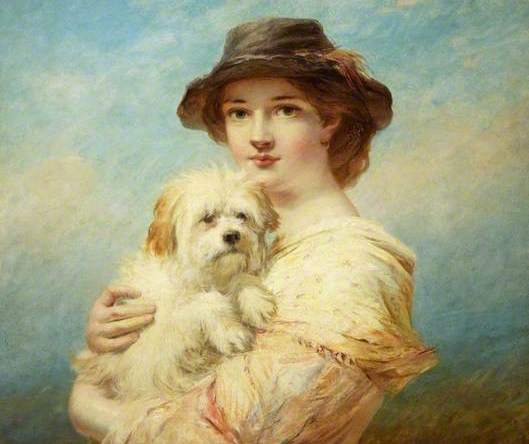

In [3]:
# Read images
img = cv2.imread('./Images/00000039.jpg')
# display image
cv2_imshow(img)

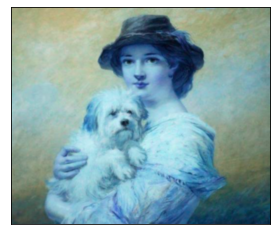

In [4]:
# show image with matplotlib
img = cv2.imread('./Images/00000039.jpg', -1) # 1(colored image), 0(gray), -1(unchanged)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

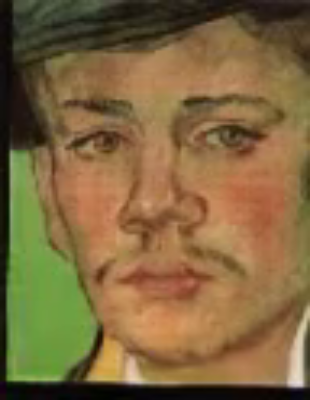

In [5]:
#display video frame
frameWidth=310
frameHeight=400
cap=cv2.VideoCapture('./Video/arn_1.mp4')
for i in range(10):
  ret, frame = cap.read()
  frame = cv2.resize(frame, (frameWidth, frameHeight))
  #display captured frame
cv2_imshow(frame)

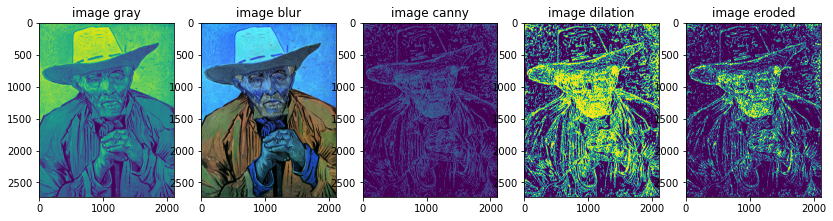

In [6]:
# basic functions
img = cv2.imread("./Images/Portrait_of_Patience_Escalier.jpg")
kernel = np.ones((5,5),np.uint8)
 
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(img,(5, 5),0)
imgCanny = cv2.Canny(img,100,150)
imgDilation = cv2.dilate(imgCanny,kernel,iterations=1)
imgEroded = cv2.erode(imgDilation,kernel,iterations=1)

fig, axes = plt.subplots(1, 5, figsize=(14,14))
axes[0].imshow(imgGray)
axes[0].set_title('image gray')
axes[1].imshow(imgBlur)
axes[1].set_title('image blur')
axes[2].imshow(imgCanny)
axes[2].set_title('image canny')
axes[3].imshow(imgDilation)
axes[3].set_title('image dilation');
axes[4].imshow(imgEroded)
axes[4].set_title('image eroded');

(1722, 1333, 3)
(300, 225, 3)
(200, 300, 3)


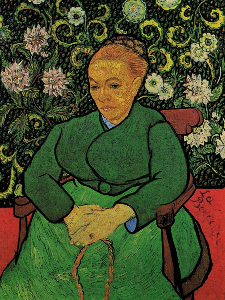

In [7]:
# crop and resize images
 
img = cv2.imread("./Images/La_Berceuse_Augustine_Roulin.jpg")
print(img.shape)
 
imgResize = cv2.resize(img,(225,300))
print(imgResize.shape)
 
imgCropped = img[0:200,200:500]
print(imgCropped.shape)
 
cv2_imshow(imgResize)
#cv2_imshow(imgResize)
#cv2_imshow(imgCropped)

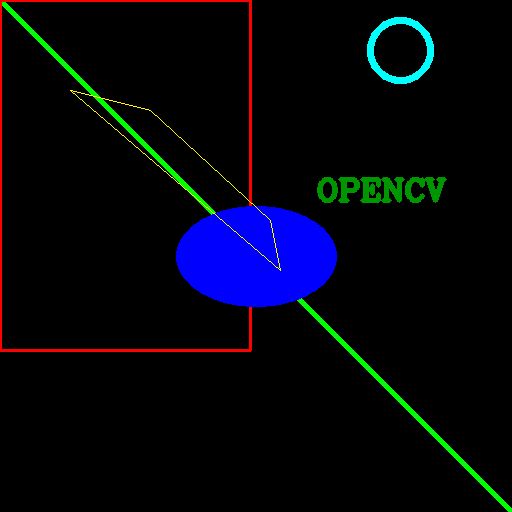

In [8]:
# shapes and text
img = np.zeros((512,512,3),np.uint8)
#print(img)
#img[:]= 255,0,0
 
cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),3)
cv2.rectangle(img,(0,0),(250,350),(0,0,255),2)
cv2.circle(img,(400,50),30,(255,255,0),5)
cv2.ellipse(img,(256,256),(80,50),0,0,360,255,-1)
#drawing polygon
pts = np.array([[70,90],[280,270],[270,220],[150,110]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

cv2.putText(img," OPENCV  ",(300,200),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),3)
 
cv2_imshow(img)

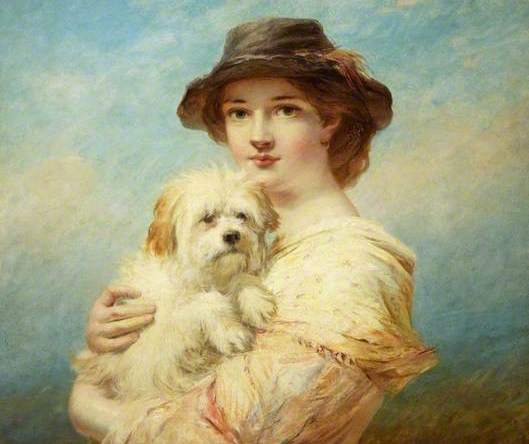

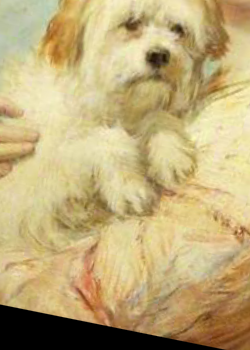

In [9]:
# warp perspective
img = cv2.imread("./Images/00000039.jpg")
 
width,height = 250,350
pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))
 
cv2_imshow(img)
cv2_imshow(imgOutput)

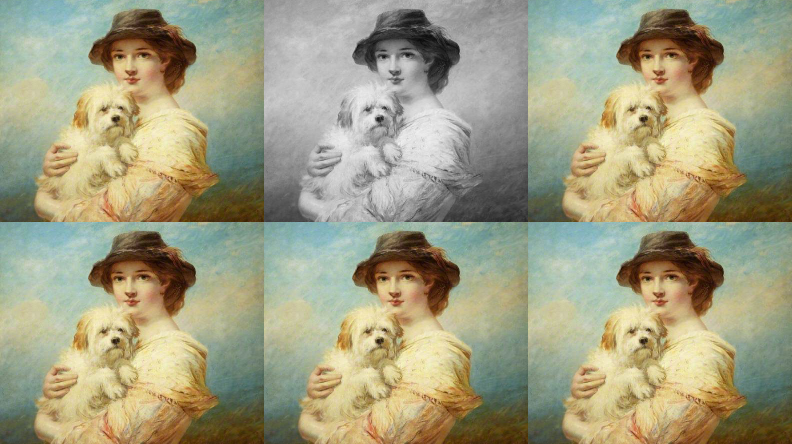

In [10]:
# join images
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver
 
img = cv2.imread('./Images/00000039.jpg')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
imgStack = stackImages(0.5,([img,imgGray,img],[img,img,img]))
 
# imgHor = np.hstack((img,img))
# imgVer = np.vstack((img,img))
#
# cv2_imshow("Horizontal",imgHor)
# cv2_imshow("Vertical",imgVer)
cv2_imshow(imgStack)

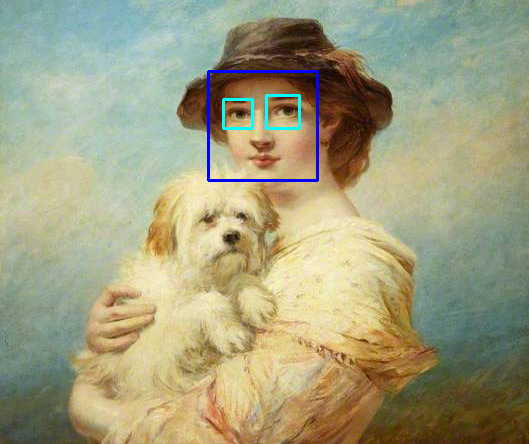

In [15]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

img = cv2.imread('./Images/00000039.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eyes = eye_cascade.detectMultiScale(gray, 1.2, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
 
cv2_imshow(img)